In [39]:
# I referrer to http://ailaby.com/least_square/
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cv2

from PIL import Image

HEIGHT = 170
WIDTH = 256

(170, 256, 3)
(170, 256, 4)


C:\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


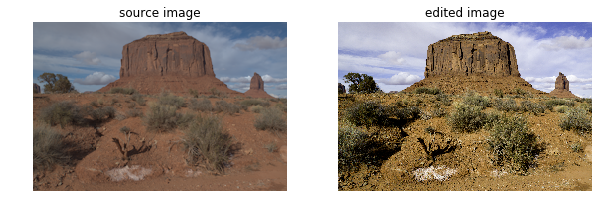

In [50]:
# show and load image
def image_loader(path):
    img_pil = Image.open(path)
    img_pil = img_pil.resize((WIDTH, HEIGHT))
#     img_np = np.asarray(img_pil) / 255.0
    img_np = np.asarray(img_pil)
    print(img_np.shape)
    
    if img_np.shape[2] > 3:
        img_np = img_np[:,:,0:3]
    
    return img_np

src_path = "./input_images/source.png"
edited_path = "./input_images/edited.png"
src_img = image_loader(src_path)
edited_img = image_loader(edited_path)

fig, (ax0, ax1) = plt.subplots(ncols=2,figsize=(10, 10))

ax0.imshow(src_img)
ax0.set_title('source image')
ax0.axis('off')

ax1.imshow(edited_img)
ax1.set_title('edited image')
ax1.axis('off')

fig.show()

save_src = Image.fromarray(src_img)
save_edited = Image.fromarray(edited_img)
save_src.save('./output_images/source.png')
save_edited.save('./output_images/edited.png')

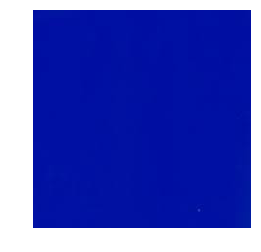

0.627450980392
0.0


In [70]:
# attention! IN PIL, the order of color is 'R' 'G' 'B'
image = np.asarray(Image.open("./input_images/blue3.jpg")) / 255.0
plt.imshow(image)
plt.axis('off')
plt.show()
print(image[:,:,2][0,0])
print(image[:,:,0][0,0])

In [71]:
def make_set(src, edited):
    sort_index = np.argsort(src)
    src = np.reshape(src[sort_index], (src.shape[0], 1))
    edited = np.reshape(edited[sort_index], (edited.shape[0], 1))
    set_img = np.concatenate([src, edited], axis=1)
    
    return set_img

src_arr = np.reshape(src_img, (HEIGHT*WIDTH, 3))
edited_arr = np.reshape(edited_img, (HEIGHT*WIDTH, 3))

red = make_set(src_arr[:, 0], edited_arr[:, 0])
green = make_set(src_arr[:, 1], edited_arr[:, 1])
blue = make_set(src_arr[:, 2], edited_arr[:, 2])

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


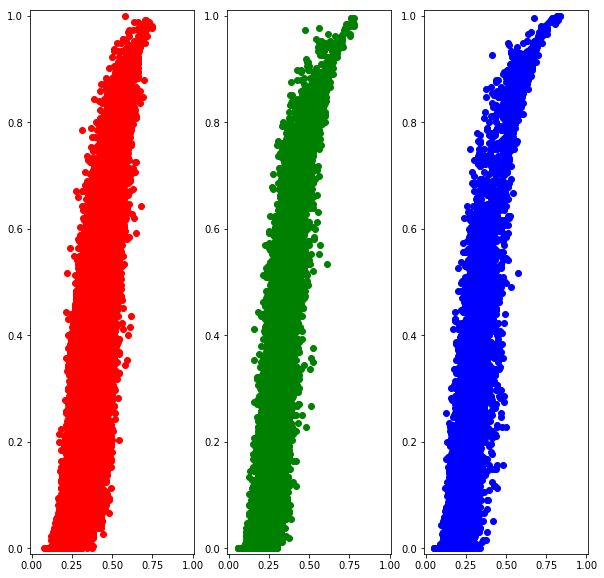

In [11]:
# show row data
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))

ax0.scatter(red[:, 0], red[:, 1], color='red')
ax0.set_xlim(-0.01, 1.01)
ax0.set_ylim(-0.01, 1.01)

ax1.scatter(green[:, 0], green[:, 1], color='green')
ax1.set_xlim(-0.01, 1.01)
ax1.set_ylim(-0.01, 1.01)

ax2.scatter(blue[:, 0], blue[:, 1], color='blue')
ax2.set_xlim(-0.01, 1.01)
ax2.set_ylim(-0.01, 1.01)


fig.show()

In [12]:
# fit tone curve
weights = [np.polyfit(red[:, 0], red[:, 1], 4),
           np.polyfit(green[:, 0], green[:, 1], 4),
           np.polyfit(blue[:, 0], blue[:, 1], 4)]

y_fit = [np.poly1d(weights[0])(red[:, 0]),
         np.poly1d(weights[1])(green[:, 0]),
         np.poly1d(weights[2])(blue[:, 0])]

In [13]:
# adjust for uint8 
for c in range(len(y_fit)):
    for iter in range(len(y_fit[c])):
        if y_fit[c][iter] > 1.0:
            y_fit[c][iter] = 1.0
        elif y_fit[c][iter] < 0:
            y_fit[c][iter] = 0
        
print(y_fit[0])

[ 0.          0.          0.         ...,  0.86545776  0.85252745
  0.85252745]


C:\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


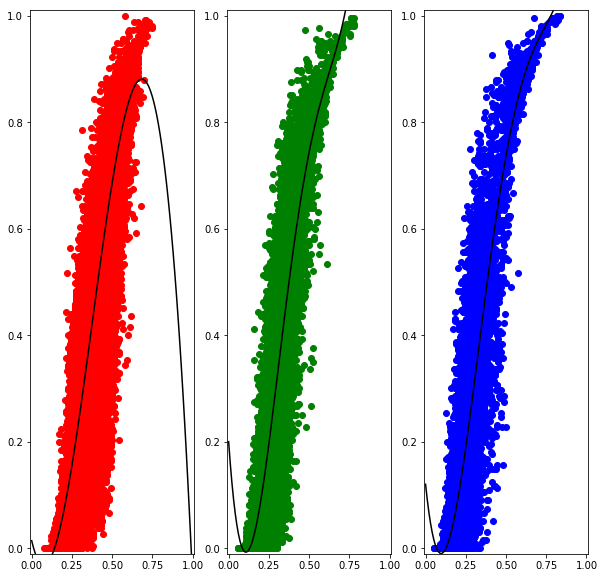

In [34]:
# show tone curve
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))

x = np.linspace(0, 1, 100)
ax0.scatter(red[:, 0], red[:, 1], color='red')
ax0.plot(x, np.poly1d(weights[0])(x), color='black')
ax0.set_xlim(-0.01, 1.01)
ax0.set_ylim(-0.01, 1.01)

ax1.scatter(green[:, 0], green[:, 1], color='green')
ax1.plot(x, np.poly1d(weights[1])(x), 'black')
ax1.set_xlim(-0.01, 1.01)
ax1.set_ylim(-0.01, 1.01)

ax2.scatter(blue[:, 0], blue[:, 1], color='blue')
ax2.plot(x, np.poly1d(weights[2])(x), color='black')
ax2.set_xlim(-0.01, 1.01)
ax2.set_ylim(-0.01, 1.01)

fig.show()

In [15]:
# fitting by SVR
from sklearn.svm import SVR

svr_rbf = [SVR(kernel='rbf', C=1e3, gamma=0.1),
           SVR(kernel='rbf', C=1e3, gamma=0.1),
           SVR(kernel='rbf', C=1e3, gamma=0.1)]

svr_rbf[0].fit(red[:,0].reshape(red.shape[0], 1), red[:, 1])
svr_rbf[1].fit(green[:,0].reshape(green.shape[0], 1), green[:, 1])
svr_rbf[2].fit(blue[:,0].reshape(blue.shape[0], 1), blue[:, 1])

y_rbf = [svr_rbf[0].predict(red[:,0].reshape(red.shape[0], 1)),
         svr_rbf[1].predict(green[:,0].reshape(green.shape[0], 1)),
         svr_rbf[2].predict(blue[:,0].reshape(green.shape[0], 1))]

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [36]:
params = svr_rbf[0].get_params
print(params)

<bound method BaseEstimator.get_params of SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)>


In [21]:
# adjust for uint8 
for c in range(len(y_rbf)):
    for iter in range(len(y_rbf[c])):
        if y_rbf[c][iter] > 1.0:
            y_rbf[c][iter] = 1.0
        elif y_rbf[c][iter] < 0:
            y_rbf[c][iter] = 0

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


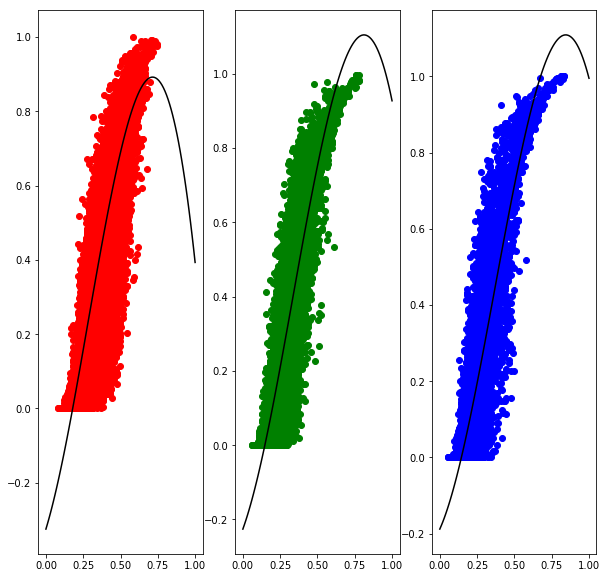

In [35]:
# show tone curve by SVR
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))

x = np.linspace(0, 1, 100)
x = np.reshape(x, (len(x), 1))
ax0.scatter(red[:, 0], red[:, 1], color='red')
ax0.plot(x, svr_rbf[0].predict(x) , color='black')
# ax0.set_xlim(-0.01, 1.01)
# ax0.set_ylim(-0.01, 1.01)

ax1.scatter(green[:, 0], green[:, 1], color='green')
ax1.plot(x, svr_rbf[1].predict(x), 'black')
# ax1.set_xlim(-0.01, 1.01)
# ax1.set_ylim(-0.01, 1.01)

ax2.scatter(blue[:, 0], blue[:, 1], color='blue')
ax2.plot(x, svr_rbf[2].predict(x), color='black')
# ax2.set_xlim(-0.01, 1.01)
# ax2.set_ylim(-0.01, 1.01)

fig.show()

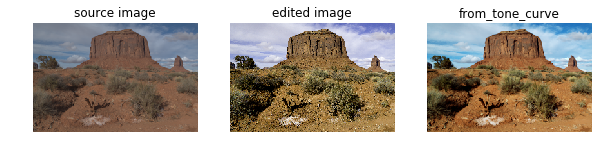

In [30]:
# by poly
out_np = np.zeros_like(src_img)

for c in range(3):
    tmp = np.poly1d(weights[c])(src_arr[:, c])
    out_np[:, :, c] = np.reshape(tmp, (out_np.shape[0], out_np.shape[1]))
    
out_np = out_np * 255
# adjust for uint8 
for y in range(out_np.shape[0]):
    for x in range(out_np.shape[1]):
        for c in range(out_np.shape[2]):
            if out_np[y,x,c] > 255:
                out_np[y,x,c] = 255
            elif out_np[y,x,c] < 0:
                out_np[y,x,c] = 0
    
out_pil = Image.fromarray(np.uint8(out_np))
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3,figsize=(10, 10))
ax0.imshow(src_img)
ax0.set_title('source image')
ax0.axis('off')

ax1.imshow(edited_img)
ax1.set_title('edited image')
ax1.axis('off')

ax2.imshow(out_pil)
ax2.set_title('from_tone_curve')
ax2.axis('off')

out_pil.save('./output_images/from_tone_curve_by-poly.png')

(-0.5, 255.5, 169.5, -0.5)

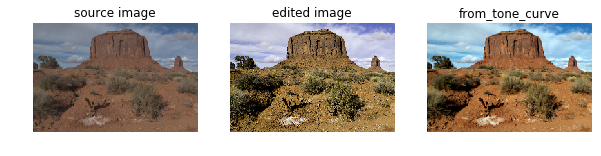

In [28]:
# by svr
out_np = np.zeros_like(src_img)

for c in range(3):
    tmp = svr_rbf[c].predict(src_arr[:, c].reshape(src_arr.shape[0], 1))
    out_np[:, :, c] = np.reshape(tmp, (out_np.shape[0], out_np.shape[1])) 
    
out_np = out_np * 255
# adjust for uint8 
for y in range(out_np.shape[0]):
    for x in range(out_np.shape[1]):
        for c in range(out_np.shape[2]):
            if out_np[y,x,c] > 255:
                out_np[y,x,c] = 255
            elif out_np[y,x,c] < 0:
                out_np[y,x,c] = 0
    

out_pil = Image.fromarray(np.uint8(out_np))
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3,figsize=(10, 10))
ax0.imshow(src_img)
ax0.set_title('source image')
ax0.axis('off')

ax1.imshow(edited_img)
ax1.set_title('edited image')
ax1.axis('off')

ax2.imshow(out_pil)
ax2.set_title('from_tone_curve')
ax2.axis('off')

out_pil.save('./output_images/from_tone_curve_by-svr.png')